In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
dataset = pd.read_csv('dataset/heart.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


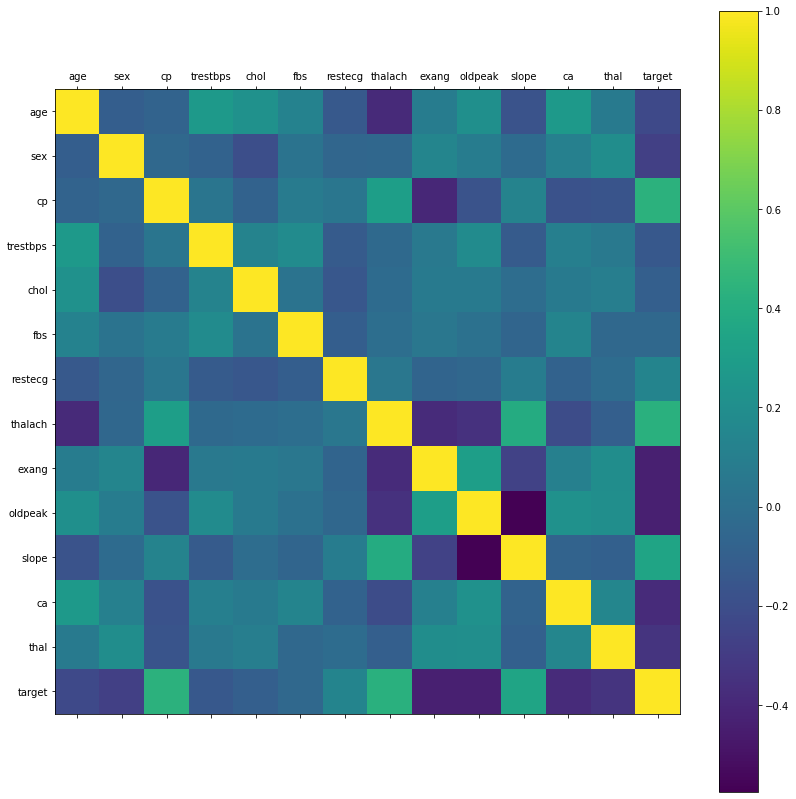

In [7]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

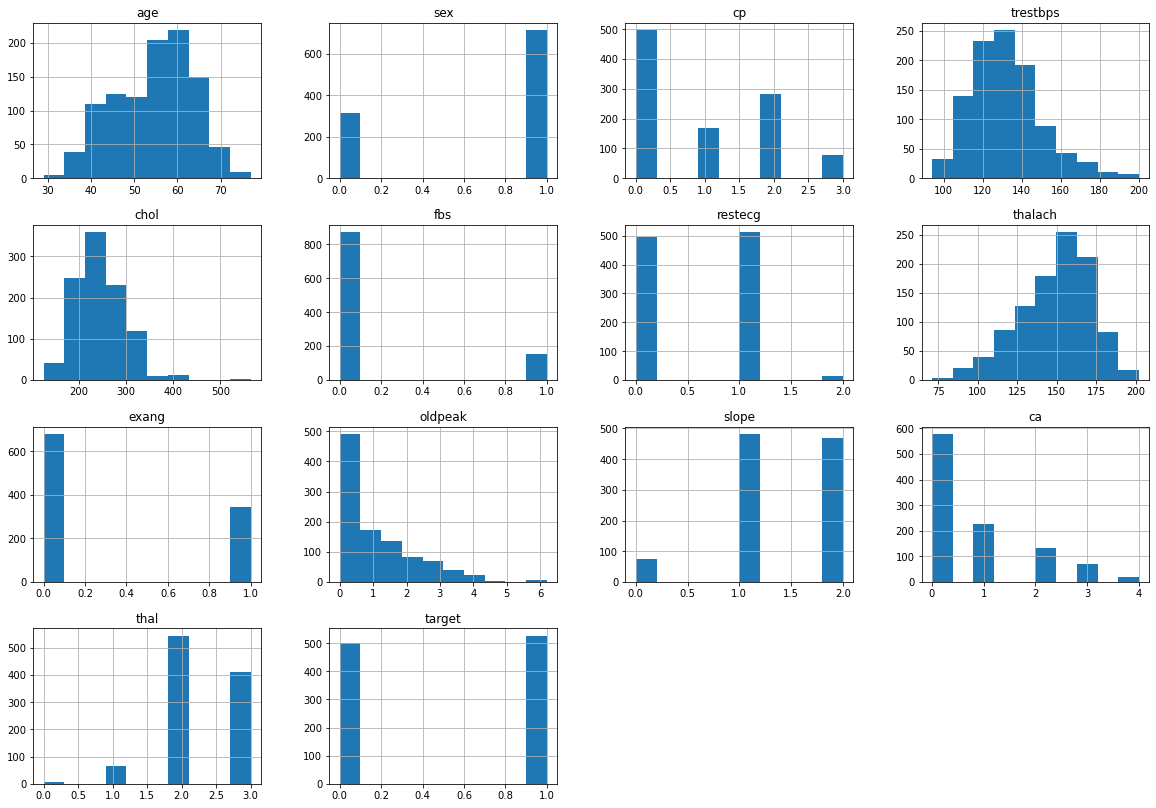

In [8]:
dataset.hist()


Text(0.5, 1.0, 'Count of each Target Class')

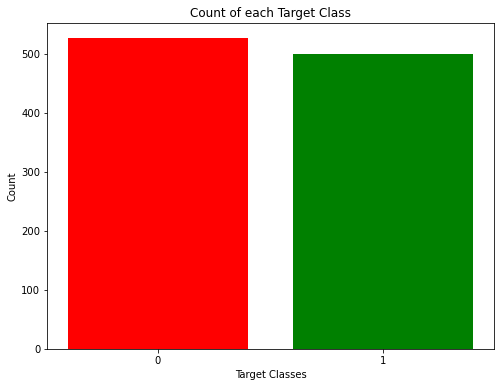

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset["thal"] = dataset["thal"].astype(float)
dataset["ca"] = dataset["ca"].astype(float)

In [12]:
dataset["target"] = (dataset["target"] > 0).astype(int)

In [13]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [14]:
x = dataset.drop(columns=["target"])

In [15]:
y = dataset["target"]

In [17]:
scaler = StandardScaler()

In [60]:
scaler

StandardScaler()

In [18]:
numerical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]


In [19]:
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])

In [62]:
x_train[numerical_columns]

,age,trestbps,chol,thalach,oldpeak
955,0.832507,-0.077005,-0.298837,-0.082191,0.622933
833,0.058595,0.497528,-0.586608,-1.594340,3.852089
581,-1.157553,0.497528,-0.216617,1.386754,-0.906667
46,-1.489230,0.210261,-0.874379,-0.687050,-0.906667
120,-0.051964,-1.340977,1.304458,0.349852,-0.906667
...,...,...,...,...,...
440,0.832507,1.072060,-0.031621,0.263444,0.283022
1016,1.164184,0.382621,0.749472,1.127529,0.283022
165,0.500830,2.221126,1.653894,-0.341416,1.982578
7,0.058595,1.646593,0.893357,-0.125395,-0.226844


In [20]:
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

In [21]:
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [22]:
model = tf.keras.models.Sequential()

In [23]:
x_train.shape[1]

30

In [24]:
model.add(tf.keras.layers.Dense(units=16, activation='relu',input_shape=(x_train.shape[1],)))


In [25]:
model.add(tf.keras.layers.Dropout(0.2))

In [26]:
model.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [27]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [28]:

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 500,validation_data=(x_test,y_test),class_weight=class_weight_dict)

Epoch 1/500
23/23 [==============================] - 0s 4ms/step - loss: 0.1553 - accuracy: 0.9386 - val_loss: 0.1720 - val_accuracy: 0.9286
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1571 - accuracy: 0.9442 - val_loss: 0.1733 - val_accuracy: 0.9351
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1381 - accuracy: 0.9582 - val_loss: 0.1728 - val_accuracy: 0.9383
Epoch 4/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 0.9498 - val_loss: 0.1688 - val_accuracy: 0.9383
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1450 - accuracy: 0.9526 - val_loss: 0.1699 - val_accuracy: 0.9383
Epoch 6/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1591 - accuracy: 0.9456 - val_loss: 0.1697 - val_accuracy: 0.9481
Epoch 7/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1462 - accuracy: 0.9470 - val_loss: 0.1689 - val_accuracy: 0.9481
Epoch 8/500
2

Epoch 59/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1100 - accuracy: 0.9568 - val_loss: 0.1000 - val_accuracy: 0.9675
Epoch 60/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0935 - accuracy: 0.9693 - val_loss: 0.0960 - val_accuracy: 0.9675
Epoch 61/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.9707 - val_loss: 0.0972 - val_accuracy: 0.9675
Epoch 62/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9735 - val_loss: 0.0954 - val_accuracy: 0.9675
Epoch 63/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0895 - accuracy: 0.9707 - val_loss: 0.0955 - val_accuracy: 0.9675
Epoch 64/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.9623 - val_loss: 0.0912 - val_accuracy: 0.9740
Epoch 65/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9651 - val_loss: 0.0928 - val_accuracy: 0.9675
Epoch 

23/23 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9819 - val_loss: 0.0632 - val_accuracy: 0.9805
Epoch 117/500
23/23 [==============================] - 0s 4ms/step - loss: 0.0693 - accuracy: 0.9791 - val_loss: 0.0644 - val_accuracy: 0.9740
Epoch 118/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9805 - val_loss: 0.0595 - val_accuracy: 0.9805
Epoch 119/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9749 - val_loss: 0.0628 - val_accuracy: 0.9805
Epoch 120/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9665 - val_loss: 0.0617 - val_accuracy: 0.9805
Epoch 121/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.9735 - val_loss: 0.0606 - val_accuracy: 0.9805
Epoch 122/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9721 - val_loss: 0.0589 - val_accuracy: 0.9805
Epoch 123/500

23/23 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9819 - val_loss: 0.0425 - val_accuracy: 0.9870
Epoch 174/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9749 - val_loss: 0.0410 - val_accuracy: 0.9805
Epoch 175/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9791 - val_loss: 0.0408 - val_accuracy: 0.9805
Epoch 176/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9833 - val_loss: 0.0396 - val_accuracy: 0.9870
Epoch 177/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9777 - val_loss: 0.0392 - val_accuracy: 0.9870
Epoch 178/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9861 - val_loss: 0.0373 - val_accuracy: 0.9870
Epoch 179/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9763 - val_loss: 0.0409 - val_accuracy: 0.9870
Epoch 180/500

23/23 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9861 - val_loss: 0.0275 - val_accuracy: 0.9870
Epoch 231/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9861 - val_loss: 0.0288 - val_accuracy: 0.9935
Epoch 232/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9791 - val_loss: 0.0256 - val_accuracy: 0.9935
Epoch 233/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9833 - val_loss: 0.0267 - val_accuracy: 0.9870
Epoch 234/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9805 - val_loss: 0.0273 - val_accuracy: 0.9870
Epoch 235/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9861 - val_loss: 0.0276 - val_accuracy: 0.9870
Epoch 236/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9819 - val_loss: 0.0281 - val_accuracy: 0.9870
Epoch 237/500

23/23 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9874 - val_loss: 0.0200 - val_accuracy: 0.9935
Epoch 288/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9930 - val_loss: 0.0192 - val_accuracy: 0.9935
Epoch 289/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0193 - val_accuracy: 0.9935
Epoch 290/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0192 - val_accuracy: 0.9935
Epoch 291/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9819 - val_loss: 0.0189 - val_accuracy: 0.9935
Epoch 292/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9833 - val_loss: 0.0192 - val_accuracy: 0.9935
Epoch 293/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9888 - val_loss: 0.0227 - val_accuracy: 0.9870
Epoch 294/500

23/23 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9916 - val_loss: 0.0158 - val_accuracy: 0.9935
Epoch 345/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9874 - val_loss: 0.0149 - val_accuracy: 0.9935
Epoch 346/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9902 - val_loss: 0.0145 - val_accuracy: 0.9935
Epoch 347/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9847 - val_loss: 0.0157 - val_accuracy: 0.9935
Epoch 348/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9874 - val_loss: 0.0155 - val_accuracy: 0.9935
Epoch 349/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9874 - val_loss: 0.0171 - val_accuracy: 0.9935
Epoch 350/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9847 - val_loss: 0.0169 - val_accuracy: 0.9935
Epoch 351/500

23/23 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9874 - val_loss: 0.0142 - val_accuracy: 0.9935
Epoch 402/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9944 - val_loss: 0.0155 - val_accuracy: 0.9935
Epoch 403/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9930 - val_loss: 0.0126 - val_accuracy: 0.9935
Epoch 404/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9874 - val_loss: 0.0121 - val_accuracy: 0.9935
Epoch 405/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9888 - val_loss: 0.0123 - val_accuracy: 0.9935
Epoch 406/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0120 - val_accuracy: 0.9935
Epoch 407/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9916 - val_loss: 0.0120 - val_accuracy: 0.9935
Epoch 408/500

23/23 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9888 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 459/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9958 - val_loss: 0.0097 - val_accuracy: 0.9935
Epoch 460/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9930 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 461/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9902 - val_loss: 0.0103 - val_accuracy: 0.9935
Epoch 462/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9874 - val_loss: 0.0103 - val_accuracy: 0.9935
Epoch 463/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9944 - val_loss: 0.0103 - val_accuracy: 0.9935
Epoch 464/500
23/23 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9833 - val_loss: 0.0114 - val_accuracy: 0.9935
Epoch 465/500

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


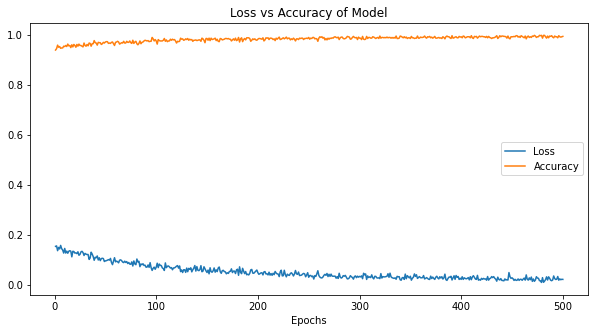

In [69]:
import matplotlib.pyplot as plt

epochs = range(1, 501) 
plt.figure(figsize=(10, 5))
plt.title("Loss vs Accuracy of Model")
plt.plot(epochs, history.history['loss'][:500], label='Loss')
plt.plot(epochs, history.history['accuracy'][:500], label='Accuracy')
plt.grid()
plt.xlabel("Epochs")
plt.grid()
plt.legend()
plt.show()

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
y_pred = (model.predict(x_test) > 0.5).astype(int) 

10/10 [==============================] - 0s 779us/step


In [72]:
conf_matrix = confusion_matrix(y_test, y_pred)

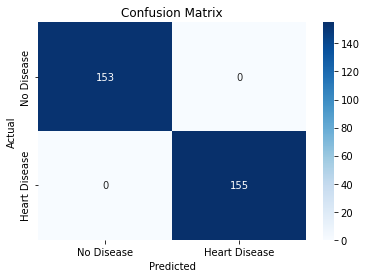

In [73]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [74]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       155

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [75]:
feature_columns = x.columns
print(feature_columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_4.0', 'thal_0.0',
       'thal_1.0', 'thal_2.0', 'thal_3.0'],
      dtype='object')


In [76]:
x_train.columns.tolist()

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'sex_0',
 'sex_1',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'fbs_0',
 'fbs_1',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'exang_0',
 'exang_1',
 'slope_0',
 'slope_1',
 'slope_2',
 'ca_0.0',
 'ca_1.0',
 'ca_2.0',
 'ca_3.0',
 'ca_4.0',
 'thal_0.0',
 'thal_1.0',
 'thal_2.0',
 'thal_3.0']

In [77]:
def predict_heart_disease(model, scaler, feature_columns, user_input):
    df = pd.DataFrame([user_input])
    df = pd.get_dummies(df)
    df = df.reindex(columns=feature_columns, fill_value=0)  # Ensure same column order
    df[numerical_columns] = scaler.transform(df[numerical_columns])
    
    prediction = model.predict(df)[0][0]
    
    print(f"Raw Model Output: {prediction}")
    
    return "No Heart Disease Detected" if prediction > 0.5 else "Heart Disease Detected"


In [78]:
new_patient_healthy = {
    "age": 30, "sex": 0, "cp": 0, "trestbps": 120, "chol": 180, "fbs": 0, "restecg": 0,
    "thalach": 170, "exang": 0, "oldpeak": 0.0, "slope": 2, "ca": 0, "thal": 2
}

In [79]:
predict_heart_disease(model,scaler,feature_columns,new_patient_healthy)

1/1 [==============================] - 0s 16ms/step
Raw Model Output: 0.9301667213439941


'No Heart Disease Detected'

In [80]:
new_patient_disease = {
    "age": 65, "sex": 1, "cp": 3, "trestbps": 140, "chol": 300, "fbs": 1, "restecg": 2,
    "thalach": 120, "exang": 1, "oldpeak": 2.5, "slope": 1, "ca": 2, "thal": 3
}

In [81]:
predict_heart_disease(model,scaler,feature_columns,new_patient_disease)

1/1 [==============================] - 0s 16ms/step
Raw Model Output: 0.0003438600979279727


'Heart Disease Detected'

In [82]:
new_patient = {
    "age": 25, "sex": 0, "cp": 0, "trestbps": 110, "chol": 160, "fbs": 0, "restecg": 0,
    "thalach": 180, "exang": 0, "oldpeak": 0.0, "slope": 2, "ca": 0, "thal": 2
}

In [83]:
predict_heart_disease(model,scaler,feature_columns,new_patient)

1/1 [==============================] - 0s 58ms/step
Raw Model Output: 0.9930155277252197


'No Heart Disease Detected'

In [84]:
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

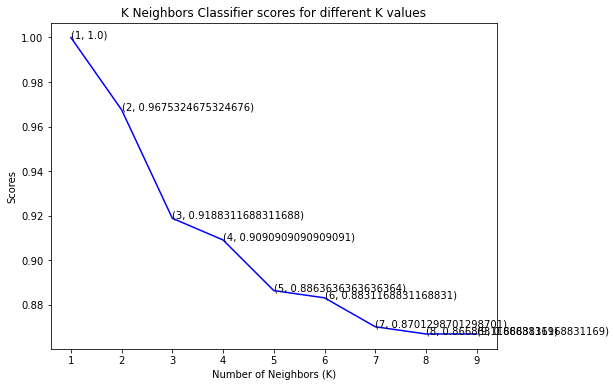

In [85]:
plt.plot([k for k in range(1, 10)], knn_scores, color = 'blue')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [86]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 86.68831168831169% with 8 nieghbors.


In [87]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

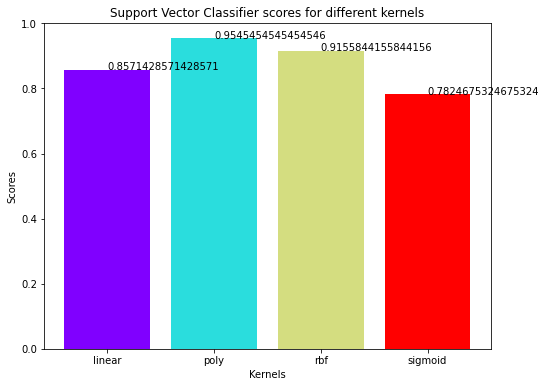

In [88]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [89]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 85.71428571428571% with linear kernel.


In [90]:
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append(dt_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

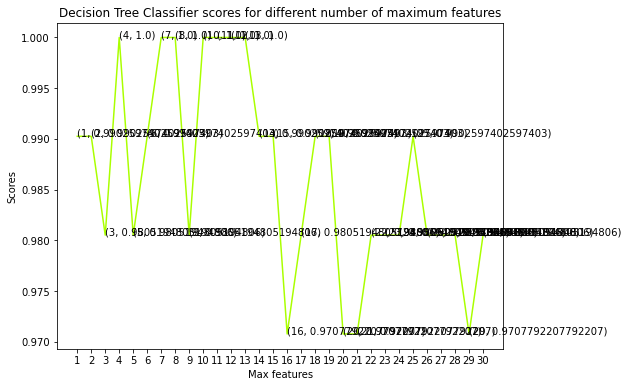

In [91]:
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color = '#AAFF00')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [92]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[13]*100, [2,4,14]))

The score for Decision Tree Classifier is 99.02597402597402% with [2, 4, 14] maximum features.


In [93]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train, y_train)
    rf_scores.append(rf_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

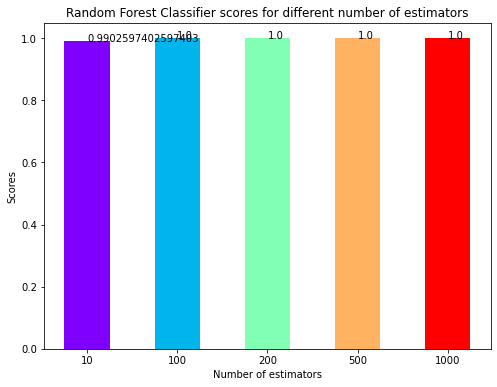

In [94]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.5)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [95]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 100.0% with [100, 500] estimators.


In [98]:
model.save("heartDisease.h5")